<a href="https://colab.research.google.com/github/fendy07/chatbot-AI/blob/master/DL_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Chatbot Using Long Short Term Memory Algorithm**

<b>Chatbot</b> merupakan bagian dari Natural Language Processing yang digunakan untuk percakapan dengan pengguna melalui teks dan ucapan. Pada praktik hari ini kita akan membuat sebuah chat otomatis atau chatbot tentang program Kampus Merdeka dari Kementerian Pendidikan Kebudayaan Riset dan Teknologi (KEMENDIKBUDRISTEK).

Dalam tahapan Chatbot ini ada tahapan yang harus kita perhatikan yaitu,

1. Import Library
2. Load Dataset
3. Preprocessing Data
4. Input Length, Output Length and Vocabulary
5. Long Short Term Memory Model
6. Evaluation Model Analysis
7. Testing Chatbot
8. Save The Model

Dalam proyek ini, kita akan membuat chatbot tentang program Kampus Merdeka!

Sumber code: [Medium - Going Merry With Tensorflow 2.0](https://medium.com/analytics-vidhya/chatbot-with-tensorflow-2-0-going-merry-2f79284a6104)

## **Download Dataset From GitHub**

Setelah kita mengetahui apa saja alur yang digunakan untuk membuat proyek AI Chatbot maka tahapan selanjutnya adalah mengunduh atau download dataset dari GitHub milik Fendy Hendriyanto pada bagian repository AI Chatbot. Link: [Chatbot-AI](https://github.com/fendy07/chatbot-AI)

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv("train_new.csv")
df.head(40)

,question,answer
0,Apa itu Bidikmisi?,Bidikmisi adalah bantuan biaya pendidikan yang...
1,Apa tujuan Bidikmisi?,meningkatkan akses dan kesempatan belajar di p...
2,Bagaimana pembayaran untuk mahasiswa yang berb...,Mahasiswa berbeasiswa Bidik Misi dibebaskan me...
3,"Saya sudah melakukan pembayaran SPP/UKT, Ikoma...","Tidak, Anda harus login ke laman http://online..."
4,Kenapa ketika mencoba membayar ONLINE melalui ...,Perhatikan jadwal pembayaran karena pembayaran...
5,Berapakah jumlah harus dibayarkan untuk UKT/SP...,Karena jumlah yang dibayarkan tiap mahasiswa d...
6,Pembayaran melalui ATM bersama apakah bisa?,Tidak Bisa
7,Bagaimana cara untuk mendaftar beasiswa Adaro ?,Untuk mendaftar beasiswa adaro dari PENS dapat...
8,Bagaimana cara mendaftar beasiwa Djarum Plus?,Untuk mendaftar beasiswa djarum plus dapat mel...
9,Beasiswa apa saja yang bekerja sama dengan PENS?,"beasiswa yang terdaftar adalah astra, PPA, pem..."


# **Case Folding**

In [41]:
data = pd.read_csv("train_new.csv")

data['question'] = data['question'].str.lower()
data['answer'] = data['answer'].str.lower()

pertanyaan = data.iloc[4]['question']
jawaban = data.iloc[4]['answer']

print(pertanyaan)
print(jawaban)

kenapa ketika mencoba membayar online melalui atm/internet banking/teller pembayaran tidak dapat dilakukan?
perhatikan jadwal pembayaran karena pembayaran dibuka dan ditutup sesuai kalender akademik


# **Remove Punctuation**

In [45]:
import re
data['question'] = data['question'].str.lower()
data['answer'] = data['answer'].str.lower()

pertanyaan = data.iloc[4]['question']
jawaban = data.iloc[4]['answer']

pertanyaan_bersih = re.sub(r'[^\w\s]', '', pertanyaan)
jawaban_bersih = re.sub(r'[^\w\s]', '', jawaban)

print(pertanyaan_bersih)
print(jawaban_bersih)

kenapa ketika mencoba membayar online melalui atminternet bankingteller pembayaran tidak dapat dilakukan
perhatikan jadwal pembayaran karena pembayaran dibuka dan ditutup sesuai kalender akademik


# **STRIPPING**


In [46]:
import re
data['question'] = data['question'].str.lower()
data['answer'] = data['answer'].str.lower()

pertanyaan = data.iloc[4]['question']
jawaban = data.iloc[4]['answer']

pertanyaan_bersih = re.sub(r'[^\w\s]', '', pertanyaan)
jawaban_bersih = re.sub(r'[^\w\s]', '', jawaban)

# Melakukan stripping untuk menghapus spasi di awal dan akhir string
pertanyaan_bersih = pertanyaan_bersih.strip()
jawaban_bersih = jawaban_bersih.strip()

print(pertanyaan_bersih)
print(jawaban_bersih)

kenapa ketika mencoba membayar online melalui atminternet bankingteller pembayaran tidak dapat dilakukan
perhatikan jadwal pembayaran karena pembayaran dibuka dan ditutup sesuai kalender akademik


In [48]:
tokens_pertanyaan = pertanyaan_bersih.split()
tokens_jawaban = jawaban_bersih.split()

print("Tokens Pertanyaan:", tokens_pertanyaan)
print("Tokens Jawaban:", tokens_jawaban)

Tokens Pertanyaan: ['kenapa', 'ketika', 'mencoba', 'membayar', 'online', 'melalui', 'atminternet', 'bankingteller', 'pembayaran', 'tidak', 'dapat', 'dilakukan']
Tokens Jawaban: ['perhatikan', 'jadwal', 'pembayaran', 'karena', 'pembayaran', 'dibuka', 'dan', 'ditutup', 'sesuai', 'kalender', 'akademik']


# **TF-IDF**

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Gabungkan token pertanyaan dan jawaban menjadi satu dokumen
dokumen_pertanyaan = ' '.join(tokens_pertanyaan)
dokumen_jawaban = ' '.join(tokens_jawaban)

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Membangun matriks TF-IDF dari dokumen gabungan
dokumen_gabungan = [dokumen_pertanyaan, dokumen_jawaban]
tfidf_matrix = tfidf_vectorizer.fit_transform(dokumen_gabungan)

# Mendapatkan vektor TF-IDF untuk pertanyaan dan jawaban
vektor_tfidf_pertanyaan = tfidf_matrix[0].toarray()
vektor_tfidf_jawaban = tfidf_matrix[1].toarray()

# Menampilkan vektor TF-IDF untuk pertanyaan dan jawaban
print("Vektor TF-IDF untuk Pertanyaan:")
print(vektor_tfidf_pertanyaan)
print("\nVektor TF-IDF untuk Jawaban:")
print(vektor_tfidf_jawaban)


Vektor TF-IDF untuk Pertanyaan:
[[0.         0.29480389 0.29480389 0.         0.29480389 0.
  0.29480389 0.         0.         0.         0.         0.29480389
  0.29480389 0.29480389 0.29480389 0.29480389 0.29480389 0.2097554
  0.         0.         0.29480389]]

Vektor TF-IDF untuk Jawaban:
[[0.30116963 0.         0.         0.30116963 0.         0.30116963
  0.         0.30116963 0.30116963 0.30116963 0.30116963 0.
  0.         0.         0.         0.         0.         0.42856935
  0.30116963 0.30116963 0.        ]]


In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity antara vektor TF-IDF pertanyaan dan jawaban
cosine_sim = cosine_similarity(vektor_tfidf_pertanyaan, vektor_tfidf_jawaban)

# Menampilkan hasil cosine similarity
print("Cosine Similarity antara Pertanyaan dan Jawaban:", cosine_sim[0][0])


Cosine Similarity antara Pertanyaan dan Jawaban: 0.08989473279508849


Data yang telah kita miliki dalam format JSON yang dapat digunakan melalui pandas dengan cara konversi. Data JSON yang saya miliki didapat dengan cara manual dengan mengambil beberapa referensi website tentang program Kampus Merdeka.

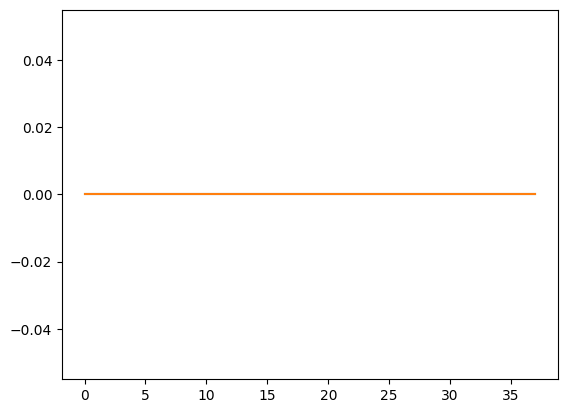

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('reward_punishment.npy')

plt.plot(data)
plt.show()